In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drone-1-dataset/p1/94.png
/kaggle/input/drone-1-dataset/p1/48.png
/kaggle/input/drone-1-dataset/p1/61.png
/kaggle/input/drone-1-dataset/p1/37.png
/kaggle/input/drone-1-dataset/p1/35.png
/kaggle/input/drone-1-dataset/p1/70.png
/kaggle/input/drone-1-dataset/p1/73.png
/kaggle/input/drone-1-dataset/p1/92.png
/kaggle/input/drone-1-dataset/p1/75.png
/kaggle/input/drone-1-dataset/p1/89.png
/kaggle/input/drone-1-dataset/p1/11.png
/kaggle/input/drone-1-dataset/p1/95.png
/kaggle/input/drone-1-dataset/p1/97.png
/kaggle/input/drone-1-dataset/p1/76.png
/kaggle/input/drone-1-dataset/p1/31.png
/kaggle/input/drone-1-dataset/p1/4.png
/kaggle/input/drone-1-dataset/p1/43.png
/kaggle/input/drone-1-dataset/p1/40.png
/kaggle/input/drone-1-dataset/p1/33.png
/kaggle/input/drone-1-dataset/p1/85.png
/kaggle/input/drone-1-dataset/p1/9.png
/kaggle/input/drone-1-dataset/p1/56.png
/kaggle/input/drone-1-dataset/p1/80.png
/kaggle/input/drone-1-dataset/p1/55.png
/kaggle/input/drone-1-dataset/p1/50.png
/k

In [2]:
import cv2

im = cv2.imread("/kaggle/input/drone-1-dataset/p1/15.png")

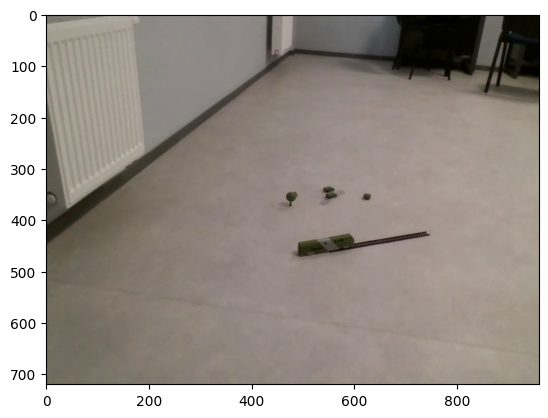

In [3]:
import matplotlib.pyplot as plt
plt.imshow(im)

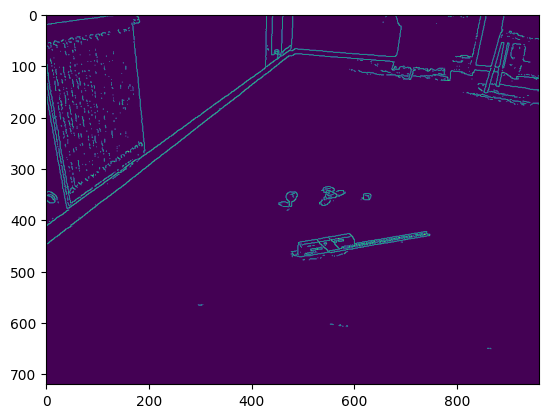

In [4]:
c = cv2.Canny(im, 50, 50)
plt.imshow(c)

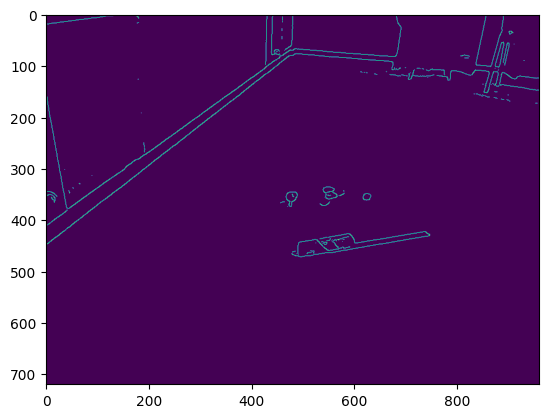

In [5]:
blurred = cv2.GaussianBlur(im, (9, 9), 0)
c = cv2.Canny(blurred, 50, 50)
plt.imshow(c)

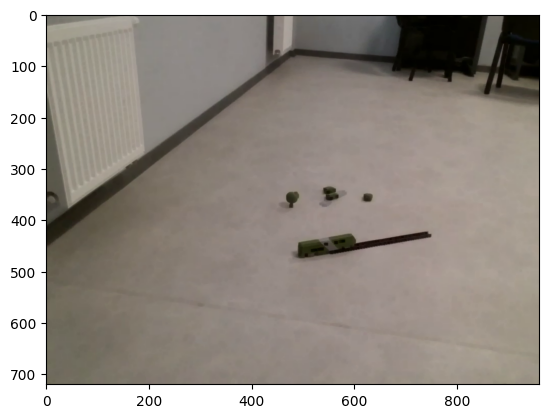

In [6]:
aa = cv2.erode(im, np.ones((2, 2)), iterations=3)
plt.imshow(aa)

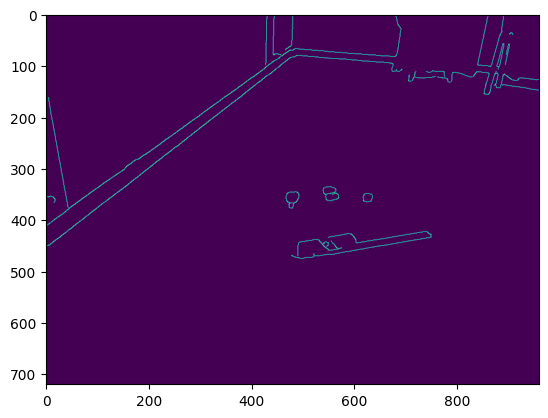

In [7]:
aa = cv2.GaussianBlur(im, (9, 9), 0)
aa = cv2.erode(aa, np.ones((2, 2)), iterations=3)
aa = cv2.Canny(aa, 50, 100)
plt.imshow(aa)

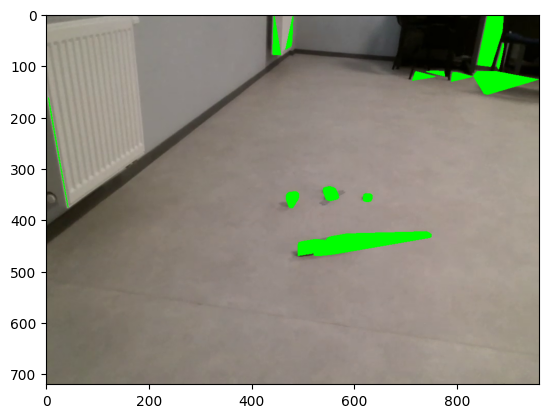

In [8]:
im2 = im.copy()

contours, hierarchy = cv2.findContours(aa, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    hull = cv2.convexHull(contour)
    area = cv2.contourArea(hull)
    if 200 < area < 10000:
        cv2.fillPoly(im2, pts=[hull], color=(0, 255, 0))

plt.imshow(im2)

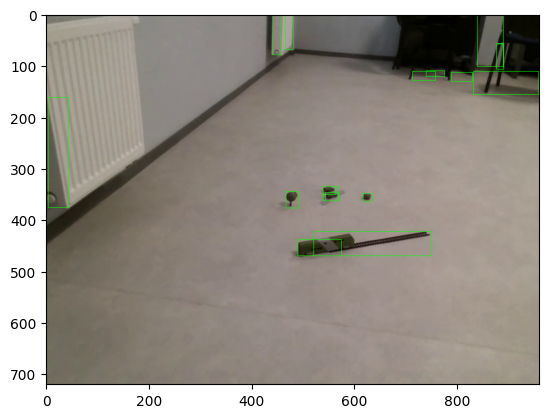

In [9]:
im2 = im.copy()

for contour in contours:
    hull = cv2.convexHull(contour)
    area = cv2.contourArea(hull)
    if 200 < area < 10000:
        # cv2.fillPoly(im2, pts=[hull], color=(0, 255, 0))
        x,y,w,h = cv2.boundingRect(hull)
        cv2.rectangle(im2, (x, y, w, h), (0, 255, 0), 1)

plt.imshow(im2)

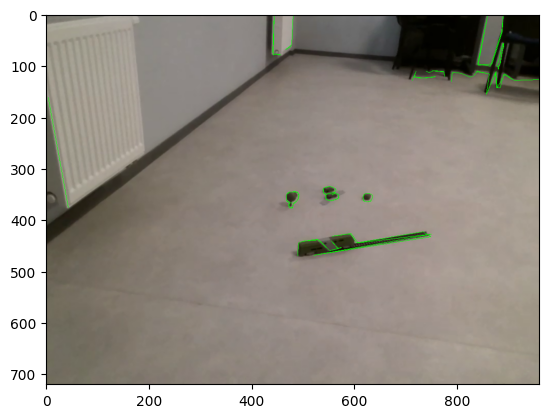

In [10]:
im2 = im.copy()
im2 = cv2.medianBlur(im2, 3)

eps = 0.01

for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, eps * peri, True)

    hull = cv2.convexHull(contour)
    area = cv2.contourArea(hull)
    if 200 < area < 10000:
        # cv2.fillPoly(im2, pts=[hull], color=(0, 255, 0))
        cv2.drawContours(im2, [approx], -1, (0, 255, 0), 1)

        # x,y,w,h = cv2.boundingRect(hull)
        # cv2.rectangle(im2, (x, y, w, h), (0, 255, 0), 1)

plt.imshow(im2)

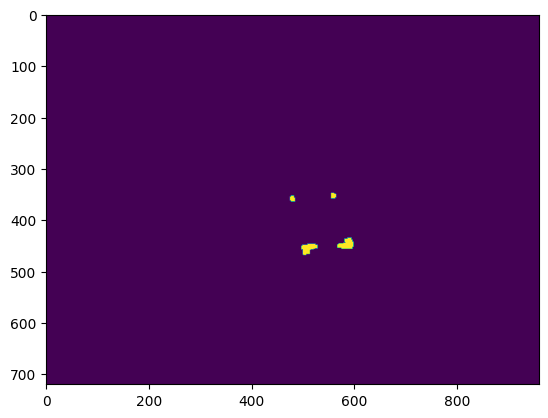

In [11]:
# зелені обʼєкти
im2 = im.copy()
hsv = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)

f = cv2.inRange(hsv, np.array([60, 50, 40]), np.array([90, 255, 255]))
f = cv2.erode(f, np.ones((2, 2), np.uint8), iterations=3)
f = cv2.dilate(f, np.ones((2, 2), np.uint8), iterations=5)
plt.imshow(f)


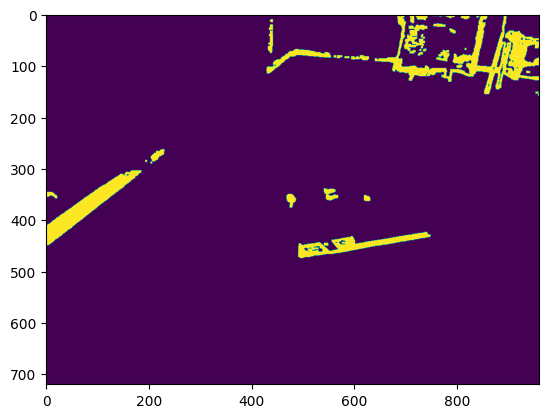

In [12]:
# чорні обʼєкти
im2 = im.copy()
hsv = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)

f = cv2.inRange(hsv, np.array([0, 50, 0]), np.array([255, 140, 60]))
# f = cv2.erode(f, np.ones((2, 2), np.uint8), iterations=3)
f = cv2.dilate(f, np.ones((2, 2), np.uint8), iterations=3)
plt.imshow(f)


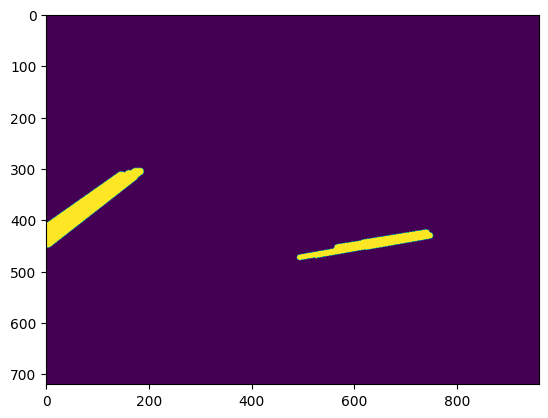

In [13]:
from math import pi
a = cv2.HoughLinesP(f, 1, pi/180, 100, 1000, 100)

mask = np.zeros(im.shape[:2], dtype="uint8")

for l in a:
    cv2.line(mask, (l[0][0], l[0][1]), (l[0][2], l[0][3]), 255, 10)

plt.imshow(mask)

/tmp/ipykernel_17/3481254994.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


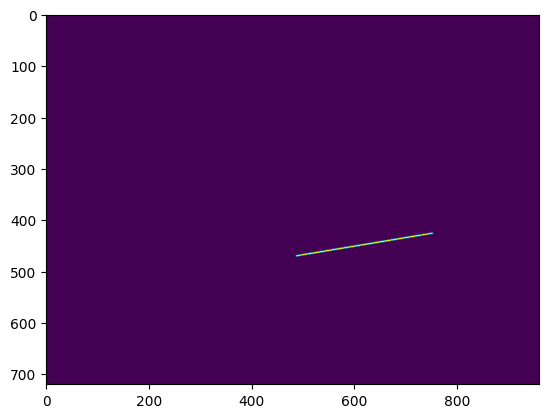

In [14]:
railway = []

mask2 = mask.copy()
mask3 = np.zeros(im.shape[:2], dtype="uint8")

# m2 = cv2.Canny(mask2, 50, 50)

contours, hierarchy = cv2.findContours(mask2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    rect = cv2.minAreaRect( contour )
    if min(rect[1]) >= 25:
        continue

    box = cv2.boxPoints(rect)
    box = np.int0(box)
    # cv2.drawContours(mask2,[box],-1,(0,0,255),3)
    
    p1a = ( int((box[0][0] + box[1][0]) / 2), int((box[0][1] + box[1][1]) / 2) )
    p2a = ( int((box[2][0] + box[3][0]) / 2), int((box[2][1] + box[3][1]) / 2) )

    p1b = ( int((box[0][0] + box[3][0]) / 2), int((box[0][1] + box[3][1]) / 2) )
    p2b = ( int((box[1][0] + box[2][0]) / 2), int((box[1][1] + box[2][1]) / 2) )

    dist1 = np.linalg.norm(np.array(p1a) - np.array(p2a))
    dist2 = np.linalg.norm(np.array(p1b) - np.array(p2b))

    if dist1 > dist2:
        p1, p2 = p1a, p2a
    else:
        p1, p2 = p1b, p2b

    cv2.line(mask3, p1, p2, 255, 2)
    railway.append([p1, p2])

plt.imshow(mask3)

In [15]:
from math import pi

def find_railways(img):
    # чорні обʼєкти
    im2 = im.copy()
    hsv = cv2.cvtColor(im2, cv2.COLOR_BGR2HSV)
    
    f = cv2.inRange(hsv, np.array([0, 50, 0]), np.array([255, 140, 60]))
    f = cv2.dilate(f, np.ones((2, 2), np.uint8), iterations=3)

    a = cv2.HoughLinesP(f, 1, pi/180, 100, 1000, 100)

    mask = np.zeros(im.shape[:2], dtype="uint8")

    for l in a:
        cv2.line(mask, (l[0][0], l[0][1]), (l[0][2], l[0][3]), 255, 10)

    railway = []

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        rect = cv2.minAreaRect( contour )
        if min(rect[1]) >= 25:
            continue
    
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        # cv2.drawContours(mask2,[box],0,(0,255,0),1)
        
        p1a = ( int((box[0][0] + box[1][0]) / 2), int((box[0][1] + box[1][1]) / 2) )
        p2a = ( int((box[2][0] + box[3][0]) / 2), int((box[2][1] + box[3][1]) / 2) )
    
        p1b = ( int((box[0][0] + box[3][0]) / 2), int((box[0][1] + box[3][1]) / 2) )
        p2b = ( int((box[1][0] + box[2][0]) / 2), int((box[1][1] + box[2][1]) / 2) )
    
        dist1 = np.linalg.norm(np.array(p1a) - np.array(p2a))
        dist2 = np.linalg.norm(np.array(p1b) - np.array(p2b))
    
        if dist1 > dist2:
            p1, p2 = p1a, p2a
        else:
            p1, p2 = p1b, p2b

        if max(dist1, dist2) < 100:
            continue
    
        railway.append([p1, p2])
    
    return railway


In [16]:

def draw_hud(img, height, mission_name):
    # drone name
    cv2.putText(img, 'ORT Drone', (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 3)
    # height
    cv2.putText(img, f'Висота: {height} м', (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 3)
    # mission name
    cv2.putText(img, f'Мiсiя: {mission_name}', (10, 110), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 3)
    # add the frame
    cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 255, 0), 5)

    return img

(587, 527) (859, 486)


/tmp/ipykernel_17/949999468.py:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


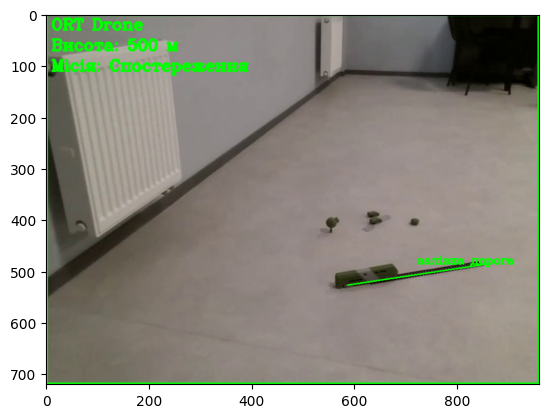

In [17]:
# im = cv2.imread("/kaggle/input/drone-1-dataset/p1/60.png")
im = cv2.imread("/kaggle/input/drone-1-dataset/p1/22.png")
out = im.copy()

for p1, p2 in find_railways(im):
    print(p1, p2)
    cv2.line(out, p1, p2, (0, 255, 0), 2, 1)
    mid = ((p1[0] + p2[0]) // 2, (p1[1] + p2[1]) // 2)
    cv2.putText(out, "залiзна дорога", (mid[0], mid[1]-20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_4)


draw_hud(out, 500, "Спостереження")
plt.imshow(out)